In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import shapiro
import statistics as stat

In [2]:
sns.set_style('darkgrid')
loans=pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#Checking for missing values
loans.isnull().sum() #No Missing Values

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
#Checking out column names
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

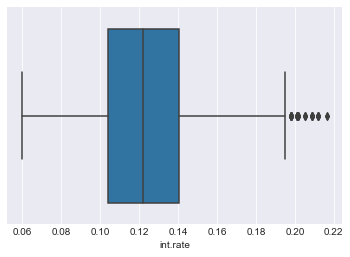

In [6]:
#Checking the outlier
#int.rate
sns.boxplot(x=loans['int.rate'])
int_Q1 = loans['int.rate'].quantile(0.25)
int_Q3 = loans['int.rate'].quantile(0.75)

In [7]:
int_IQR = int_Q3 - int_Q1
print(int_Q1,int_Q3,int_IQR)

0.1039 0.1407 0.036799999999999986


In [8]:
loans = loans[~((loans['int.rate']<(int_Q1-1.5*int_IQR))|(loans['int.rate']>(int_Q3+1.5*int_IQR)))]

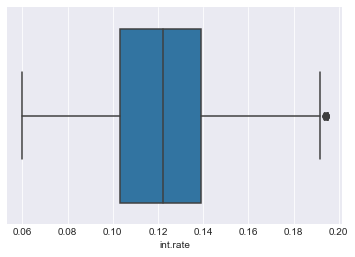

In [10]:
sns.boxplot(x=loans['int.rate'])

163.745 430.75 267.005


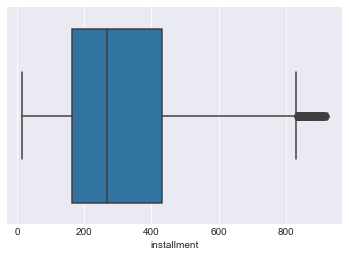

In [11]:
#installment
sns.boxplot(x=loans['installment'])
installment_Q1 = loans['installment'].quantile(0.25)
installment_Q3 = loans['installment'].quantile(0.75)
installment_IQR = installment_Q3 - installment_Q1
print(installment_Q1,installment_Q3,installment_IQR)

In [12]:
loans = loans[~((loans['installment']<(installment_Q1-1.5*installment_IQR))|(loans['installment']>(installment_Q3+1.5*installment_IQR)))]

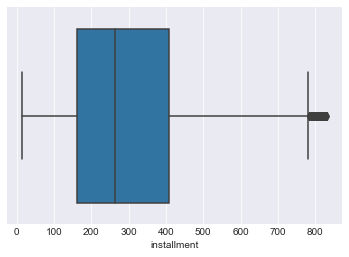

In [13]:
sns.boxplot(x=loans['installment'])

10.54534144 11.28978191 0.7444404700000007


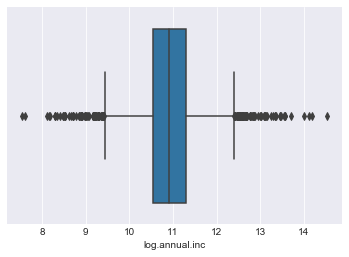

In [14]:
loans = loans[~((loans['log.annual.inc']<(income_Q1-1.5*income_IQR))|(loans['log.annual.inc']>(income_Q3+1.5*income_IQR)))]#log.annual.inc
sns.boxplot(x=loans['log.annual.inc'])
income_Q1 = loans['log.annual.inc'].quantile(0.25)
income_Q3 = loans['log.annual.inc'].quantile(0.75)
income_IQR = income_Q3 - income_Q1
print(income_Q1,income_Q3,income_IQR)

In [15]:
loans = loans[~((loans['log.annual.inc']<(income_Q1-1.5*income_IQR))|(loans['log.annual.inc']>(income_Q3+1.5*income_IQR)))]

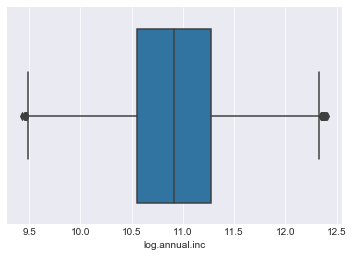

In [16]:
sns.boxplot(x=loans['log.annual.inc'])

2820.0 5699.958333 2879.9583329999996


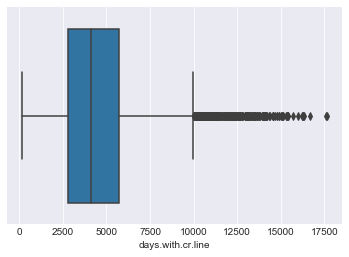

In [17]:
#days.with.cr.line
sns.boxplot(x=loans['days.with.cr.line'])
creditline_Q1 = loans['days.with.cr.line'].quantile(0.25)
creditline_Q3 = loans['days.with.cr.line'].quantile(0.75)
creditline_IQR = creditline_Q3 - creditline_Q1
print(creditline_Q1,creditline_Q3,creditline_IQR)

In [18]:
loans = loans[~((loans['days.with.cr.line']<(creditline_Q1-1.5*creditline_IQR))|(loans['days.with.cr.line']>(creditline_Q3+1.5*creditline_IQR)))]


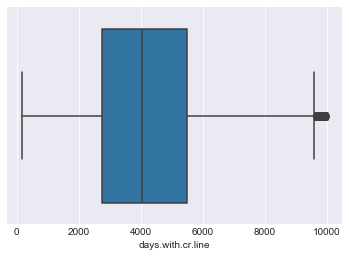

In [19]:
sns.boxplot(x=loans['days.with.cr.line'])

3183.5 17385.5 14202.0


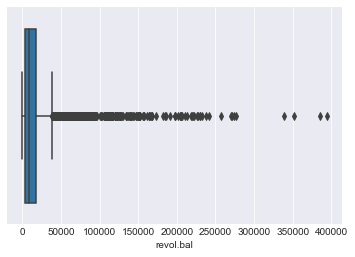

In [20]:
#revol.bal
sns.boxplot(x=loans['revol.bal'])
revol_bal_Q1 = loans['revol.bal'].quantile(0.25)
revol_bal_Q3 = loans['revol.bal'].quantile(0.75)
revol_bal_IQR = revol_bal_Q3 - revol_bal_Q1
print(revol_bal_Q1,revol_bal_Q3,revol_bal_IQR)

In [22]:
loans = loans[~((loans['revol.bal']<(revol_bal_Q1-1.5*revol_bal_IQR))|(loans['revol.bal']>(revol_bal_Q3+1.5*revol_bal_IQR)))]

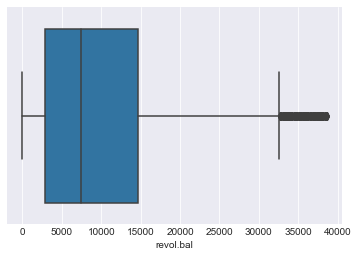

In [24]:
sns.boxplot(x=loans['revol.bal'])